In [1]:
cd ~/data/ciss/opus/

/Users/klay6683/data/ciss/opus


In [2]:
ls *.cub

N1554730872_1.cal.cub          N1595336558_1.map.cal.cub      N1595336880_1.map.cal.equ.cub
N1554730872_1.cub              N1595336558_1.map.cal.equ.cub  N1595337041_1.cal.cub
N1554730872_1.map.cal.cub      N1595336719_1.cal.cub          N1595337041_1.cub
N1595336397_1.cal.cub          N1595336719_1.cub              N1595337041_1.map.cal.cub
N1595336397_1.cub              N1595336719_1.map.cal.cub      N1595337041_1.map.cal.equ.cub
N1595336397_1.map.cal.cub      N1595336719_1.map.cal.equ.cub  N1595337202_1.cal.cub
N1595336397_1.map.cal.equ.cub  N1595336880_1.cal.cub          N1595337202_1.cub
N1595336558_1.cal.cub          N1595336880_1.cub              N1595337202_1.map.cal.cub
N1595336558_1.cub              N1595336880_1.map.cal.cub      rings_mosaic.cub


In [3]:
import gdal

In [4]:
fname = 'N1595337202_1.map.cal.cub'
ds = gdal.Open(fname)

In [45]:
plt.rcParams['image.interpolation'] = 'none'

In [5]:
from pyciss.io import CubeFile

ImportError: cannot import name load

In [6]:
img = ds.ReadAsArray()
img[img<0]=np.nan

In [7]:
%matplotlib inline

In [8]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

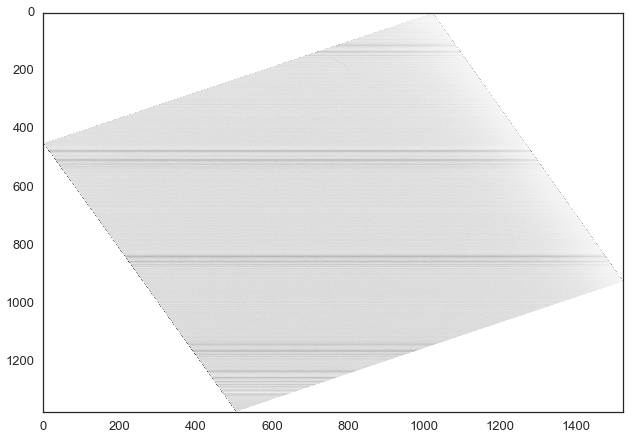

In [46]:
plt.imshow(img)

In [10]:
subframe = img[400:1000, 400:1000]

In [17]:
subframe_norm = (subframe - subframe.mean()) / subframe.std()

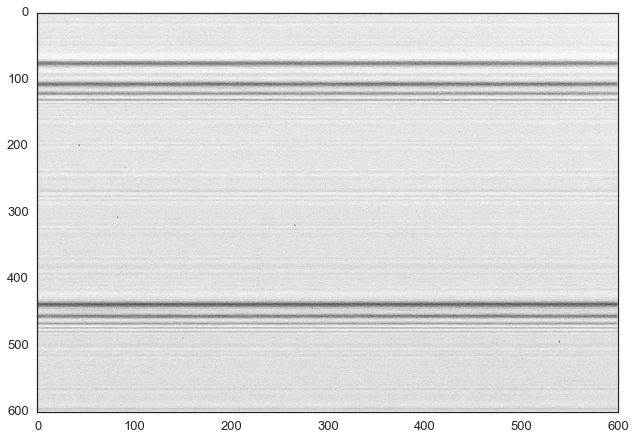

In [47]:
plt.imshow(subframe)

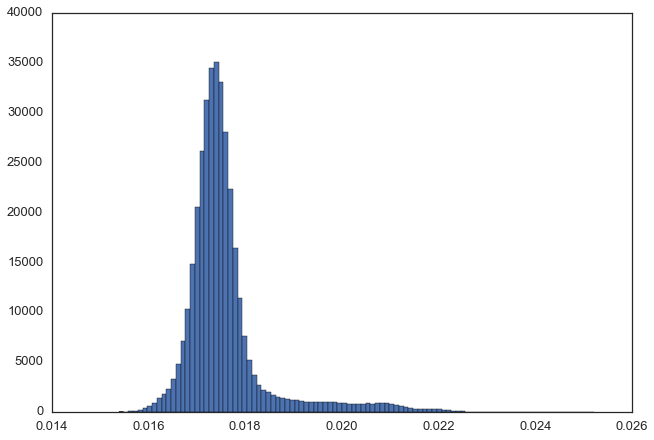

In [19]:
plt.hist(subframe.ravel(), bins=100);

In [20]:
mask = np.ma.MaskedArray(subframe>0.02)

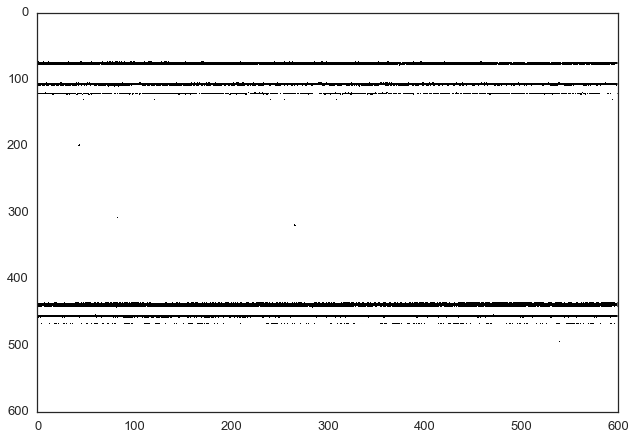

In [48]:
plt.imshow(mask)

In [22]:
F1 = np.fft.fft2(mask)

In [23]:
F2 = np.fft.fftshift(F1)

In [24]:
psd2D = np.abs(F2)**2

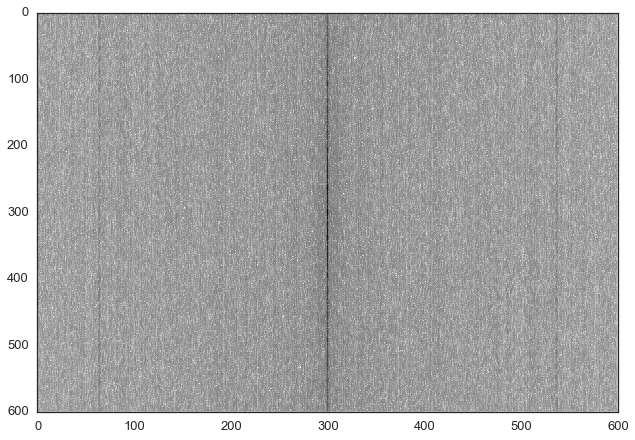

In [49]:
plt.imshow(np.log10(psd2D))

In [26]:
inverted = np.fft.ifft2(psd2D)

In [27]:
inverted.dtype

dtype('complex128')

In [28]:
invreal = inverted.real

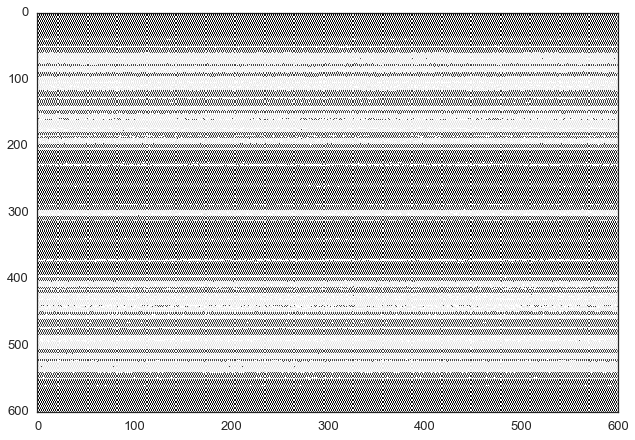

In [50]:
plt.imshow(np.log10(invreal))

In [122]:
testdata = np.zeros((100,100))

In [123]:
for i in range(100):
    testdata[i,i] = 1
    try:
        testdata[i, i+10] = 1
    except:
        pass

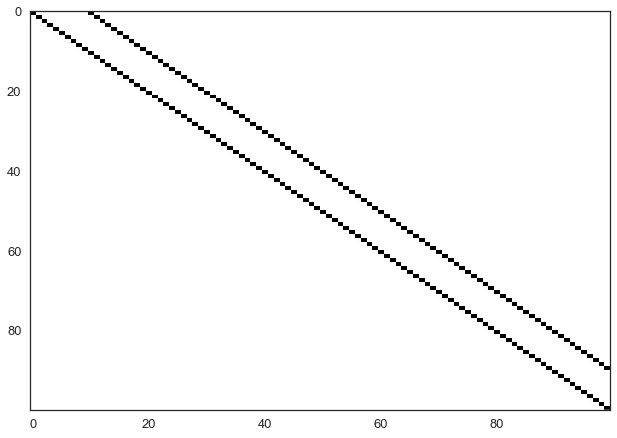

In [124]:
plt.imshow(testdata)

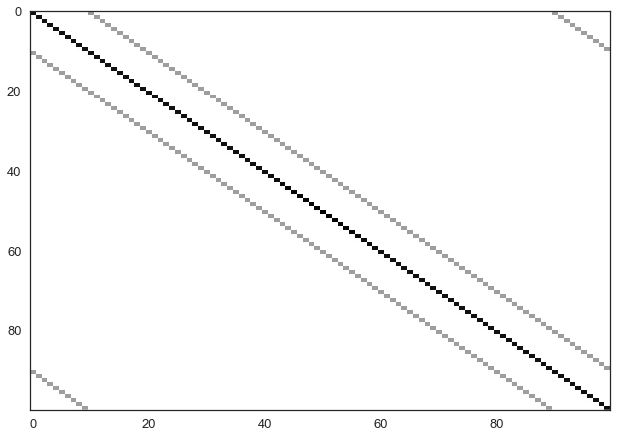

In [324]:
plt.imshow(do_autocorr(testdata))

In [222]:
from skimage.io import imread

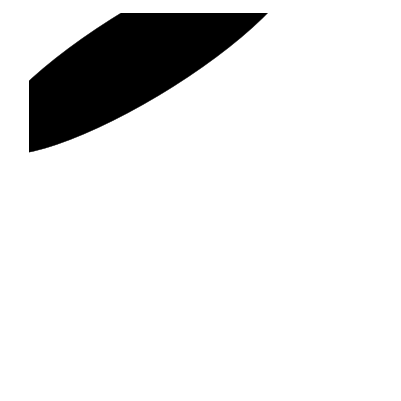

In [478]:
from pylab import figure, show, rand, subplots_adjust
from matplotlib.patches import Ellipse

NUM = 1

w = 10
ells = [Ellipse(xy=rand(2)*10, width=w, height=w*0.25, angle=rand()*3 +30)
        for i in range(NUM)]

fig = figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(1)
    e.set_facecolor('k')

subplots_adjust(top=1, bottom=0, left=0, right=1)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.axis('off')
plt.savefig('testimage.png',dpi=100, facecolor='w', edgecolor='w', transparent=True)


In [479]:
data = imread('testimage.png', as_grey=True)

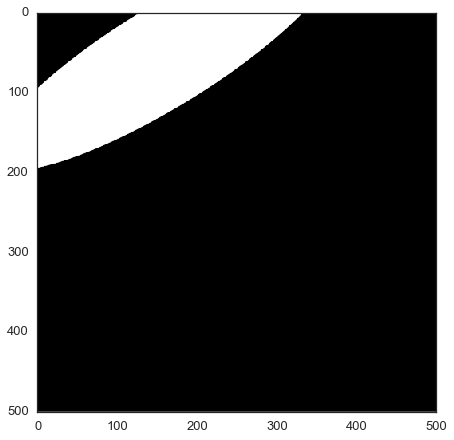

In [480]:
plt.imshow(data, aspect='equal')

In [481]:
def do_autocorr(img):
    F1 = np.fft.fft2(img)
    psd = np.abs(F1)**2
    invert = np.fft.ifft2(psd)
    invert = np.fft.fftshift(invert)
    return invert.real

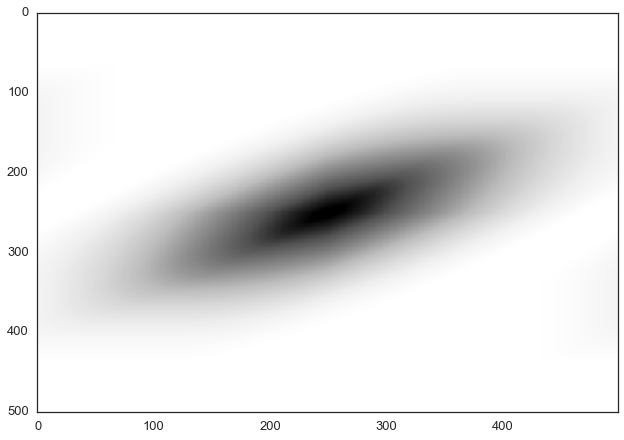

In [482]:
autocorr = do_autocorr(data)
plt.imshow(autocorr, vmax=np.percentile(autocorr, 99.9))

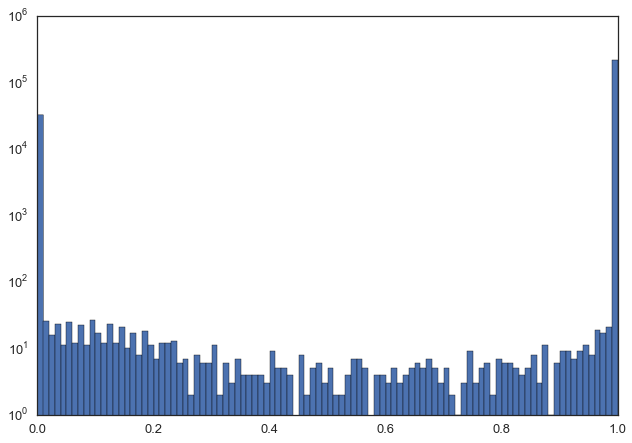

In [483]:
plt.hist(data.ravel(), 100, log=True);

In [435]:
new = np.log10(np.abs(autocorr))

In [356]:
new.min()

5.1533339651136387

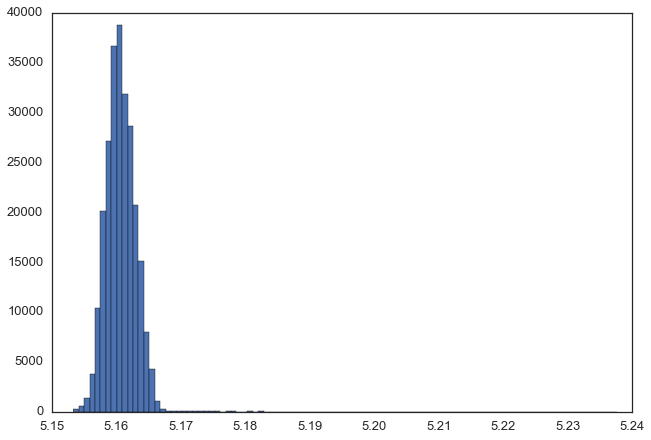

In [357]:
plt.hist(new.ravel(), bins=100);

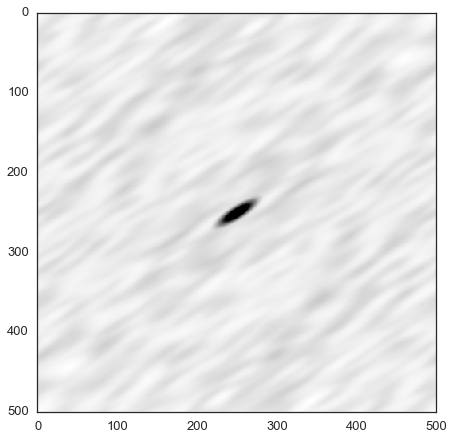

In [376]:
plt.imshow(new, vmax=np.percentile(new, 99.9), aspect='equal')

In [360]:
double = np.log10(np.abs(do_autocorr(new)))

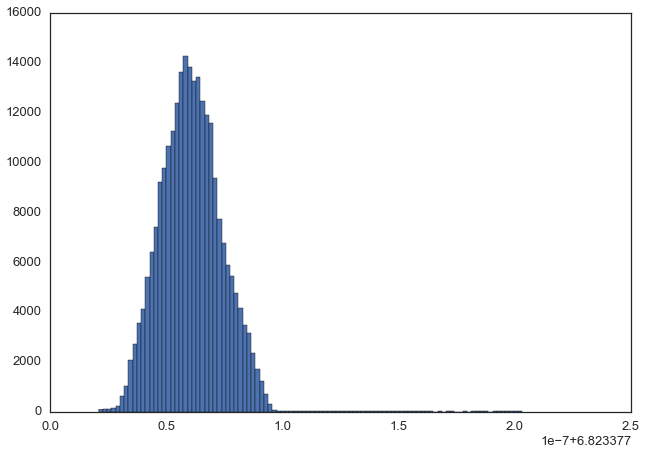

In [364]:
plt.hist(double.ravel(), 100);

In [365]:
double.max()

6.8233772032555811

In [366]:
np.percentile(double, 90)

6.8233770785281447

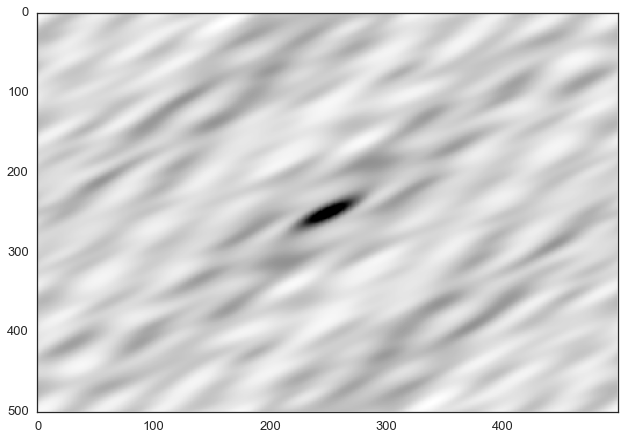

In [374]:
plt.imshow(double, vmax=np.percentile(double, 99.9))